In [2]:
import torch
print(torch.__version__)

2.7.0+cu118


In [3]:
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [4]:
#set up device agnostic coding
if torch.cuda.is_available():
    device ="cuda"
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device ="cpu"
print(f"using device ={device}")

using device =cpu


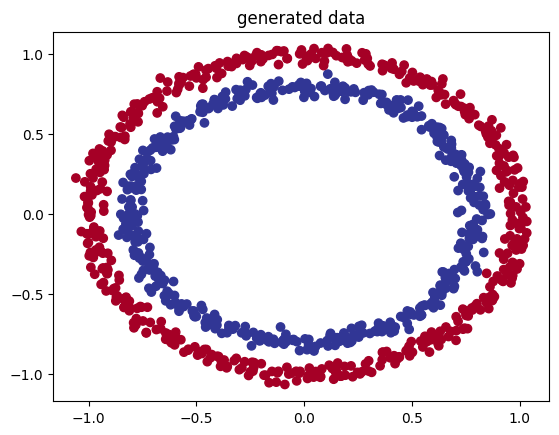

In [5]:
n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);
plt.title('generated data')
plt.show()

In [6]:
print (f"Before {type(X)}, {type(y)}")
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(f"After {type(X)}, {type(y)}")

Before <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
After <class 'torch.Tensor'>, <class 'torch.Tensor'>


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

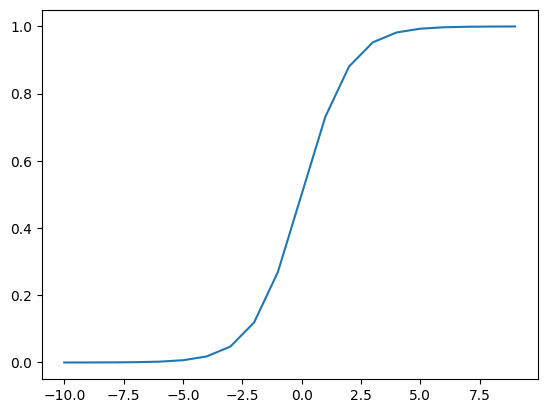

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


val = range(-10, 10)
sigmoid_val = [sigmoid(n) for n in val]
plt.plot(val, sigmoid_val);

In [9]:
print(f"{sigmoid(100):.10f}")

1.0000000000


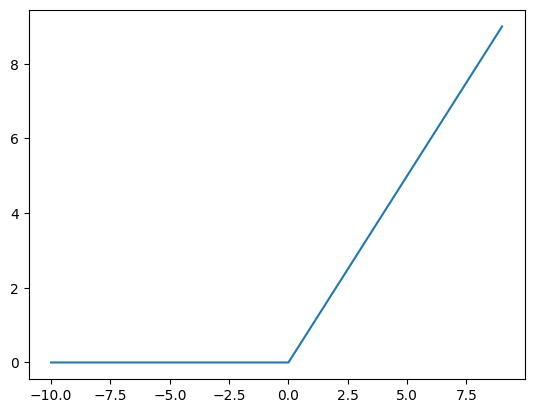

In [10]:
def relu(z):
    if z<=0:
        return 0
    else:
        return z
    

val = range(-10,10)
relu_val = [relu(n) for n in val]
plt.plot(val, relu_val)

In [11]:
class firstNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        #something goes here



    def forward(self,x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.layer_3(x)
        return x
        #something goes here

In [12]:
model = firstNeuralNetwork()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.4266,  0.3030],
         [ 0.3906, -0.2016],
         [ 0.5452,  0.5586],
         [ 0.3538, -0.1444],
         [ 0.3762,  0.6391],
         [-0.2038, -0.4076],
         [ 0.5973, -0.5934],
         [ 0.4211, -0.5443],
         [-0.2086, -0.5119],
         [ 0.4129,  0.3151]], requires_grad=True),
 Parameter containing:
 tensor([-0.3396,  0.6714,  0.4460, -0.2892,  0.3375, -0.6862, -0.0891, -0.3230,
          0.1428, -0.5241], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2278, -0.2956,  0.0461, -0.3108,  0.2576, -0.3058,  0.0642, -0.2158,
          -0.1008,  0.1423],
         [ 0.1174,  0.1360,  0.0650, -0.2302, -0.1671, -0.3113, -0.2566, -0.0683,
          -0.2875,  0.1571],
         [ 0.1054, -0.0011, -0.0155, -0.0415, -0.0753, -0.0851, -0.2873,  0.3009,
           0.2157,  0.1056],
         [-0.1016, -0.0421,  0.1903,  0.3057, -0.1740, -0.0349, -0.0281,  0.0059,
           0.0322, -0.0350],
         [-0.3154,  0.0920,  0.0369,  0.1340,

In [13]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model.parameters(), lr=0.05
)


In [14]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_true))*100
    return acc

In [15]:
epochs = 4000
torch.manual_seed(42)
trainLossList = []
testLossList = []
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)
model.to(device)
for epoch in range(epochs):
    ##Training
    model.train()
    # 1. forward pass
    y_logits = model(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    #2. computer training loss
    loss = loss_fn(y_logits, y_train)
    #3. zero grad the optimizer 
    optimizer.zero_grad()
    #4. backpropagates
    loss.backward()
    #5. step the optimizer 
    optimizer.step()

    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)
    
    ### testing 
    model.eval()
    with torch.inference_mode():
        test_logits = model (X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

    if (epoch+1)%50 == 0:
        print(f'Epoch {epoch+1}| Train Loss: {loss:.4f} | Train ACC: {acc} | Test Loss:{test_loss:.4f}| Test ACC:{test_acc}')
    trainLossList.append (loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())

Epoch 50| Train Loss: 0.6935 | Train ACC: 50.0 | Test Loss:0.6931| Test ACC:50.0
Epoch 100| Train Loss: 0.6919 | Train ACC: 55.25 | Test Loss:0.6914| Test ACC:56.49999999999999
Epoch 150| Train Loss: 0.6910 | Train ACC: 53.5 | Test Loss:0.6904| Test ACC:54.50000000000001
Epoch 200| Train Loss: 0.6901 | Train ACC: 58.375 | Test Loss:0.6896| Test ACC:61.5
Epoch 250| Train Loss: 0.6893 | Train ACC: 61.5 | Test Loss:0.6888| Test ACC:62.5
Epoch 300| Train Loss: 0.6884 | Train ACC: 62.625 | Test Loss:0.6880| Test ACC:63.5
Epoch 350| Train Loss: 0.6875 | Train ACC: 62.625 | Test Loss:0.6872| Test ACC:64.0
Epoch 400| Train Loss: 0.6864 | Train ACC: 63.125 | Test Loss:0.6863| Test ACC:65.0
Epoch 450| Train Loss: 0.6853 | Train ACC: 63.0 | Test Loss:0.6854| Test ACC:64.0
Epoch 500| Train Loss: 0.6841 | Train ACC: 62.74999999999999 | Test Loss:0.6844| Test ACC:64.5
Epoch 550| Train Loss: 0.6827 | Train ACC: 63.625 | Test Loss:0.6833| Test ACC:65.0
Epoch 600| Train Loss: 0.6811 | Train ACC: 64.625

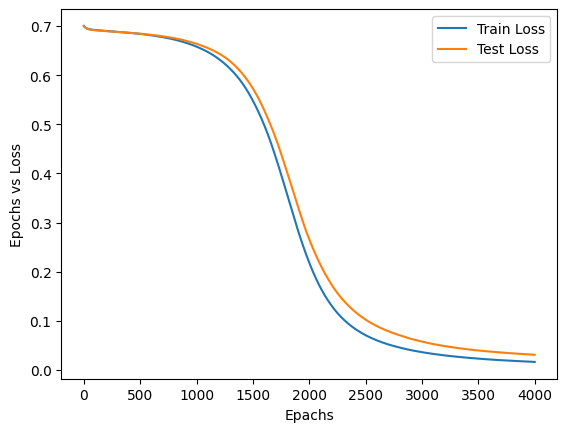

In [16]:
plt.plot(range(epochs), trainLossList, label='Train Loss')
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.legend()
plt.xlabel("Epachs")
plt.ylabel("Epochs vs Loss")
plt.show()


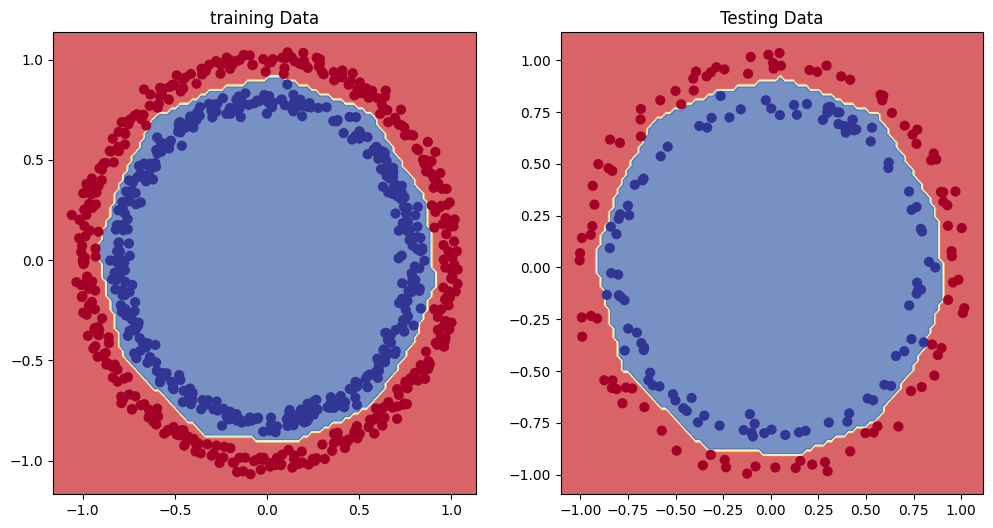

In [17]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("training Data")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model, X_test, y_test)

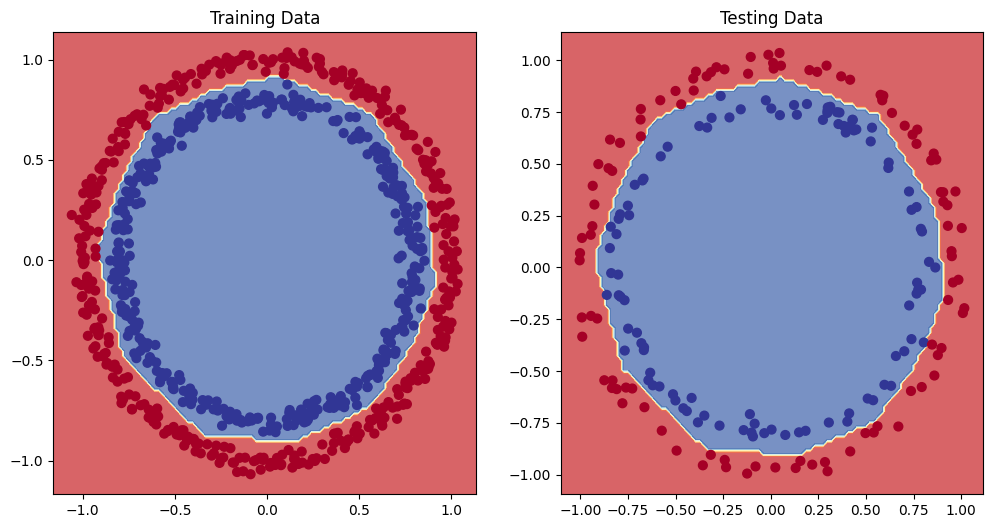

In [18]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model, X_test, y_test)
